<a href="https://colab.research.google.com/github/ds4geo/ds4geo/blob/master/WS%202020%20Course%20Notes/Session%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science for Geoscientists - Winter Semester 2020**
# **Session 8 - Unsupervised Machine Learning - 25th November 2020**

This week we will use two unsupervised machine learning techniques to an XRF core scan dataset. We will use Principle Component Analysis for dimensionality reduction and K-Means for cluster analysis.

# Part 8.1 - Introduction to Machine Learning - *mini-lecture*

![](https://imgs.xkcd.com/comics/machine_learning.png)
* Algorithms which learn from data
* e.g.
 * Classification
 * Regression
 * other transformations
* Supervised vs unsupervised
 * Supervised = labelled data
 * Unsupervised = data without labels


# Part 8.3 - XRF Core Scan data excercise
We will learn about unsupervised machine learning by going through an example data analysis and explaining the concepts as we go.

First we look into the data.

## Part 8.3.1 - Introduction to XRF core scan data - *mini-lecture*
XRF core scan data in 1 minute:
* XRF to analyse elemental composition of sediment or rock cores along a profile through the core.
* Raw data is counts
* Difficult to calibrate - water content, density, grain size etc.
* Closed sum effects: Centered Log Ratio transformation

## Part 8.3.2 - Preparing the data - *walkthrough*
The data is from a Lacustrine sediment core from Lake Meihua, Taiwan and was measured using an ITRAX  XRF core scanner.

Thanks to Steven Huang for providing the data

For references see: https://github.com/ds4geo/ds4geo_ws2020/blob/master/Assignments/Session%201/data_readme_Steven_Huang.md

We will:
* Load the data ("https://raw.githubusercontent.com/ds4geo/ds4geo/master/student_submitted_data/20201013_MHL-11-02-Steven_Huang.txt")
* Plot the data
* Apply the CLR transformation
* Standardize the data

In [ ]:
# install plotly for later plotting
!pip install -U plotly

In [ ]:
# Import everything we need for later
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import gmean
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [112]:
# Load the data
xrf = pd.read_csv("https://raw.githubusercontent.com/ds4geo/ds4geo/master/student_submitted_data/20201013_MHL-11-02-Steven_Huang.txt",header=6, sep="\t")
xrf

,correaltion depth(mm),Age (CE),sample surface,validity,kcps,MSE,Al,Si,P,S,Cl,Ar,K,Ca,Ti,V,Cr,Mn,Fe,Ni,Cu,Zn,Rb,Sr,Zr,Ba,Pb,Mo_inc,Mo_coh,inc_coh
0,10.01,2008.239753,5.83,1,31967.33594,1.05,0,179,21,0,15,161,2138,278,2228,150,212,927,90044,190,203,630,1269,819,289,100,176,40112,8539,4.697506
1,10.21,2008.181045,5.83,1,31737.14844,1.14,0,159,28,0,20,175,2291,236,2168,96,174,945,92623,211,61,625,1187,549,131,114,104,40695,8291,4.908334
2,10.41,2008.122337,5.83,1,31722.21680,1.11,7,185,22,0,29,157,2403,299,2370,90,216,1038,94421,425,170,677,1333,863,300,135,169,40500,8257,4.904929
3,10.61,2008.063629,5.84,1,31913.80273,1.13,20,209,6,17,7,178,2438,318,2354,88,213,1012,93748,266,134,758,1422,628,33,119,153,39503,8153,4.845210
4,10.81,2008.004921,5.85,1,31672.57227,1.01,10,255,26,25,41,247,2617,314,2637,124,151,938,96160,347,52,600,1140,624,76,79,125,40363,8351,4.833313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,630.61,1725.110279,6.88,1,29876.73633,1.10,41,438,14,0,20,208,4276,445,3962,83,262,1794,143487,314,304,800,1723,1048,691,215,299,24382,6890,3.538752
3104,630.81,1725.006291,6.88,1,30109.86523,1.04,48,425,22,10,0,229,4130,472,3862,189,240,1776,141284,194,252,813,1752,1064,500,251,282,24448,6993,3.496067
3105,631.01,1724.902303,6.88,1,30407.06445,1.00,55,425,15,7,10,237,4165,459,3899,93,214,1654,140623,289,181,827,1839,979,701,184,319,24950,7064,3.531993
3106,631.21,1724.798315,6.88,1,30606.98438,1.03,35,413,10,0,17,236,4115,394,3722,118,194,1483,137079,174,204,711,1750,879,674,234,227,25213,7067,3.567709


In [113]:
# Select just the element data
xrf.index = xrf["correaltion depth(mm)"]
ele = xrf.loc[:, "Al": "Pb"]
ele

,Al,Si,P,S,Cl,Ar,K,Ca,Ti,V,Cr,Mn,Fe,Ni,Cu,Zn,Rb,Sr,Zr,Ba,Pb
correaltion depth(mm),,,,,,,,,,,,,,,,,,,,,
10.01,0,179,21,0,15,161,2138,278,2228,150,212,927,90044,190,203,630,1269,819,289,100,176
10.21,0,159,28,0,20,175,2291,236,2168,96,174,945,92623,211,61,625,1187,549,131,114,104
10.41,7,185,22,0,29,157,2403,299,2370,90,216,1038,94421,425,170,677,1333,863,300,135,169
10.61,20,209,6,17,7,178,2438,318,2354,88,213,1012,93748,266,134,758,1422,628,33,119,153
10.81,10,255,26,25,41,247,2617,314,2637,124,151,938,96160,347,52,600,1140,624,76,79,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630.61,41,438,14,0,20,208,4276,445,3962,83,262,1794,143487,314,304,800,1723,1048,691,215,299
630.81,48,425,22,10,0,229,4130,472,3862,189,240,1776,141284,194,252,813,1752,1064,500,251,282
631.01,55,425,15,7,10,237,4165,459,3899,93,214,1654,140623,289,181,827,1839,979,701,184,319


(650.0, 0.0)

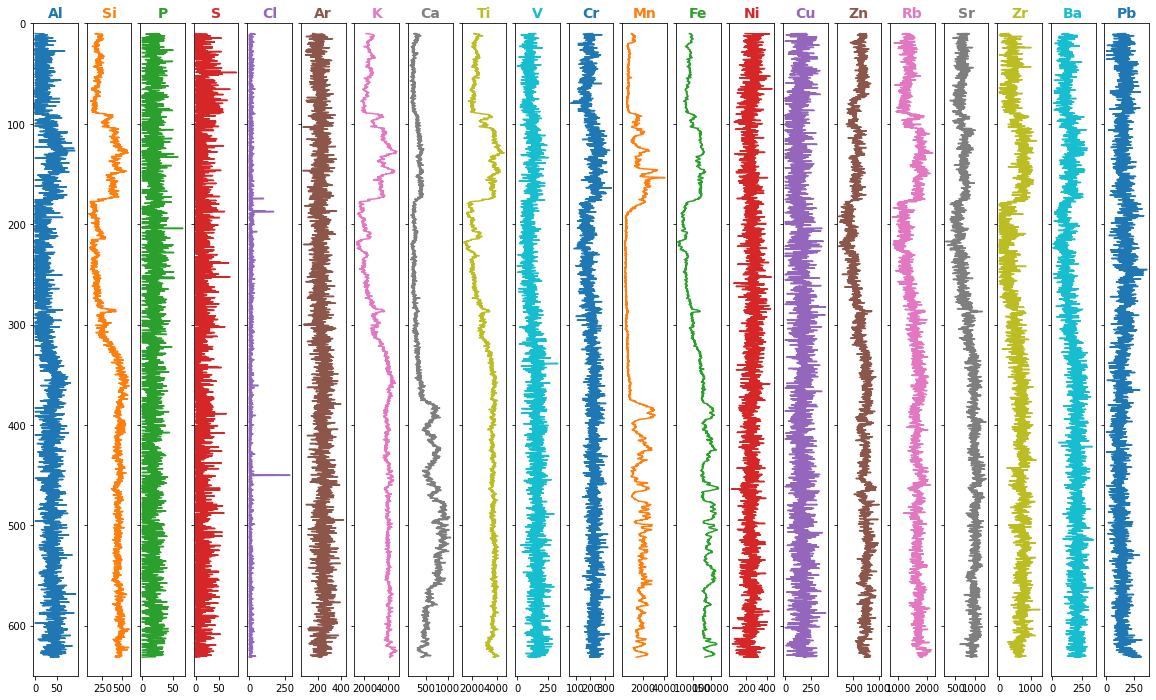

In [114]:
# Make a quick overview plot
fig, ax = plt.subplots(ncols=ele.shape[1], figsize=(20,12), sharey="all")
# plot each element
for (i, a), (l, d) in zip(enumerate(ax), ele.iteritems()):
  a.plot(d.values, d.index, label=l, color="C{}".format(i))
  a.set_title(l, fontdict={"color": "C{}".format(i), "fontweight": "bold", "fontsize":14})
#ax[0].invert_yaxis()
ax[0].set_ylim(650,0)

In [116]:
# Select elements with signal which are never 0
elements = ["Si", "Ar", "K", "Ca", "Ti", "Cr", "Mn", "Fe", "Ni", "Zn", "Rb" ,"Sr", "Ba"]
edf = ele.loc[:,elements]


In [117]:
# Apply centered log ratio
clr = np.log(edf / gmean(edf))
clr

,Si,Ar,K,Ca,Ti,Cr,Mn,Fe,Ni,Zn,Rb,Sr,Ba
correaltion depth(mm),,,,,,,,,,,,,
10.01,-0.601069,-0.352650,-0.401943,-0.373334,-0.333168,0.022516,-0.146332,-0.233777,-0.251973,-0.003304,-0.195726,-0.002074,-0.456922
10.21,-0.719550,-0.269268,-0.332825,-0.537123,-0.360468,-0.175015,-0.127100,-0.205538,-0.147139,-0.011272,-0.262527,-0.402060,-0.325894
10.41,-0.568099,-0.377808,-0.285096,-0.300512,-0.271383,0.041208,-0.033234,-0.186312,0.553092,0.068648,-0.146524,0.050256,-0.156818
10.61,-0.446120,-0.252271,-0.270636,-0.238904,-0.278157,0.027221,-0.058602,-0.193465,0.084499,0.181660,-0.081891,-0.267618,-0.282969
10.81,-0.247191,0.075334,-0.199785,-0.251562,-0.164631,-0.316791,-0.134535,-0.168062,0.350328,-0.052094,-0.302927,-0.274008,-0.692645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630.61,0.293764,-0.096516,0.291204,0.097119,0.242476,0.234274,0.513918,0.232169,0.250396,0.235588,0.110111,0.244480,0.308545
630.81,0.263635,-0.000332,0.256464,0.156024,0.216913,0.146568,0.503834,0.216697,-0.231139,0.251707,0.126802,0.259632,0.463360
631.01,0.263635,0.034006,0.264902,0.128095,0.226448,0.031905,0.432666,0.212007,0.167430,0.268781,0.175266,0.176373,0.152843


In [ ]:
# Standardize
sxrf = StandardScaler().fit_transform(X=clr)
sxrf = pd.DataFrame(sxrf, index=clr.index, columns=clr.columns)
sxrf

In [121]:
!pip install hvplot
!pip install altair

     |████████████████████████████████| 71kB 4.4MB/s 
     |████████████████████████████████| 1.6MB 12.2MB/s 


In [129]:
# Plot standardized data with plotly
sxrf.plot(y=["Si", "Mn", "Ca", "K"], width=1200, height=400, backend="plotly")
#sxrf.plot(y=["Si", "Mn", "Ca", "K"], width=1200, height=400, backend="hvplot")

# Part 8.4 - Principle Component Analysis

## Part 8.4.1 - Introduction to PCA - *mini-lecture*
* Dimensionality reduction
* One answer to the question: if I have multi-variate data, can I represent all the information but in less variables
* Imagine rotating data so largest variance in data is aligned with the axis.
 * The data can then be described in terms of the rotation (a vector), and values along that axis.
 * Can do this several times on the same data to calculate the 1st, 2nd, 3rd, nth "principle components", each describing less about the variance of the original data.

Further explained by example:


## Part 8.4.2 - applying PCA to the XRF core scan data - *walkthrough*

We will:
* Apply (fit) the PCA
* Look at the explained variance
* Transform the data into PC space
* Plot the transformed data in PC space and interpret
* Plot the PC space data down core

In [130]:
# Create and fit the PCA - i.e calculate the rotation/transformation/vectors
pca = PCA()
pca.fit(clr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [131]:
# variance explained by each component of the PCA
pca.explained_variance_

array([1.04673425, 0.16261003, 0.07863417, 0.05608593, 0.05328064,
       0.04619141, 0.02500821, 0.01818148, 0.01384488, 0.00806207,
       0.00427113, 0.00237825, 0.00112079])

In [133]:
# variance explained by each component as a ratio of total variance
evr = pca.explained_variance_ratio_
for i,v in enumerate(evr):
  ev = round(v*100,1)
  print("Principle Component {} explains {}% of the total variance".format(i+1,ev))

Principle Component 1 explains 69.0% of the total variance
Principle Component 2 explains 10.7% of the total variance
Principle Component 3 explains 5.2% of the total variance
Principle Component 4 explains 3.7% of the total variance
Principle Component 5 explains 3.5% of the total variance
Principle Component 6 explains 3.0% of the total variance
Principle Component 7 explains 1.6% of the total variance
Principle Component 8 explains 1.2% of the total variance
Principle Component 9 explains 0.9% of the total variance
Principle Component 10 explains 0.5% of the total variance
Principle Component 11 explains 0.3% of the total variance
Principle Component 12 explains 0.2% of the total variance
Principle Component 13 explains 0.1% of the total variance


In [134]:
# .components indicates the contribution of each feature (elements) to each principle component
pca.components_[0:2,:]

array([[-0.40279543, -0.05372941, -0.26872688, -0.41628748, -0.23230561,
        -0.1064419 , -0.55827559, -0.23410113,  0.04258204, -0.14856691,
        -0.11178576, -0.18194416, -0.29682277],
       [-0.2509212 , -0.08611671, -0.18526798,  0.0889791 , -0.09853636,
        -0.10021497,  0.69205779, -0.02452372, -0.11676843, -0.15708801,
        -0.11287333, -0.19302071, -0.54751641]])

In [139]:
# Transform the data
pcat = pca.transform(clr)
pcat = pd.DataFrame(pcat, index=clr.index)

Text(0, 0.5, 'PC2 - explained variance: 10.7%')

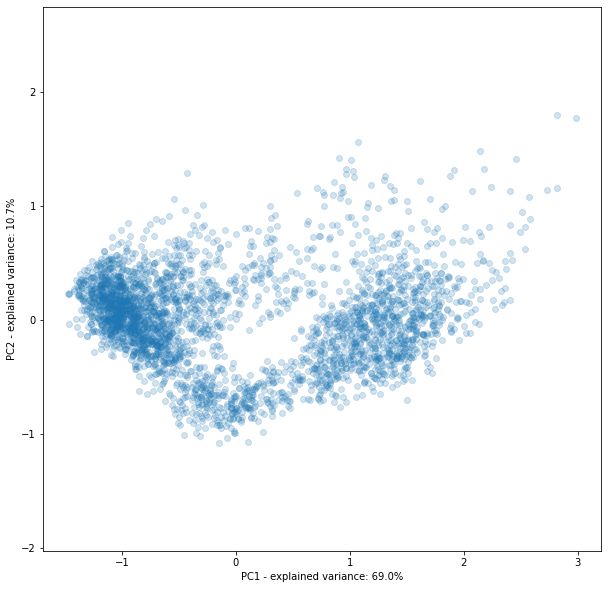

In [140]:
# Plot PC1 and PC2
fig, ax = plt.subplots(figsize=(10,10))
pc2plot = (1,2)
ax.scatter(pcat.loc[:, pc2plot[0]-1], pcat.loc[:, pc2plot[1]-1], alpha=0.2)
ax.axis('equal')
ax.set_xlabel("PC{} - explained variance: {}%".format(pc2plot[0], round(evr[pc2plot[0]-1]*100,1)))
ax.set_ylabel("PC{} - explained variance: {}%".format(pc2plot[1], round(evr[pc2plot[1]-1]*100,1)))

#ax.set_aspect(aspect=evr[pc2plot[1]-1]/evr[pc2plot[0]-1])

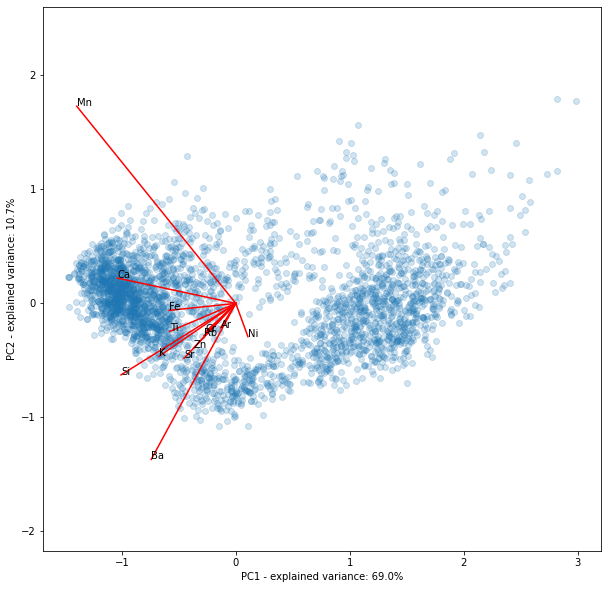

In [141]:
# Visualise how different elements contribute to the visualised PCs
fig, ax = plt.subplots(figsize=(10,10))
pc2plot = (1,2)
ax.scatter(pcat.loc[:, pc2plot[0]-1], pcat.loc[:, pc2plot[1]-1], alpha=0.2)
ax.axis('equal')
ax.set_xlabel("PC{} - explained variance: {}%".format(pc2plot[0], round(evr[pc2plot[0]-1]*100,1)))
ax.set_ylabel("PC{} - explained variance: {}%".format(pc2plot[1], round(evr[pc2plot[1]-1]*100,1)))

# plot the element vectors
for v, nm in zip(pca.components_[0:2,:].T, elements):
  vec = v * 2.5
  plt.plot([0,vec[0]], [0, vec[1]],"r")
  plt.text(vec[0],vec[1], nm)

In [142]:
# re plot data to help interpretation
clr.plot(y=["Si", "Mn", "Ca", "K"], width=1200, height=400, backend="plotly")

Text(0, 0.5, 'Mn')

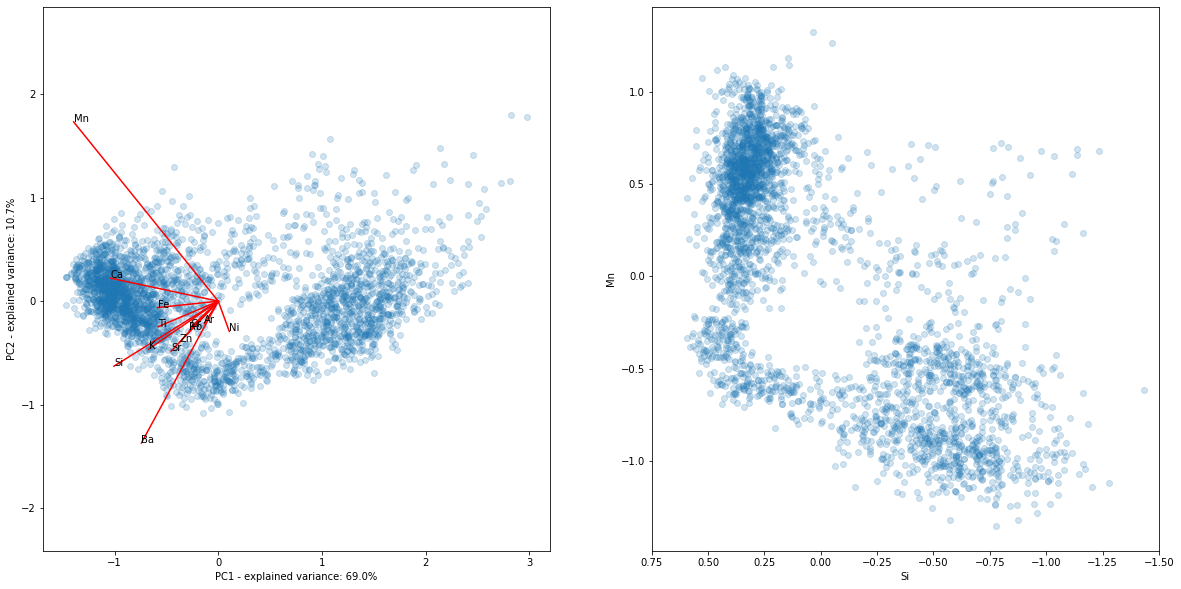

In [146]:
# Check back in terms of the element data
# Mn and e.g. Si account for a large part of the variance, so the PCA plot should
# look similar to a rotated version of the Mn-Si scatter plot:
fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(20,10))

pc2plot = (1,2)
ax.scatter(pcat.loc[:, pc2plot[0]-1], pcat.loc[:, pc2plot[1]-1], alpha=0.2)
ax.axis('equal')
ax.set_xlabel("PC{} - explained variance: {}%".format(pc2plot[0], round(evr[pc2plot[0]-1]*100,1)))
ax.set_ylabel("PC{} - explained variance: {}%".format(pc2plot[1], round(evr[pc2plot[1]-1]*100,1)))

# plot the element vectors
for v, nm in zip(pca.components_[0:2,:].T, elements):
  vec = v * 2.5
  ax.plot([0,vec[0]], [0, vec[1]],"r")
  ax.text(vec[0],vec[1], nm)


ax2.scatter(clr["Si"], clr["Mn"], alpha=0.2)
ax2.set_xlim(0.75, -1.5)
ax2.set_xlabel("Si")
ax2.set_ylabel("Mn")

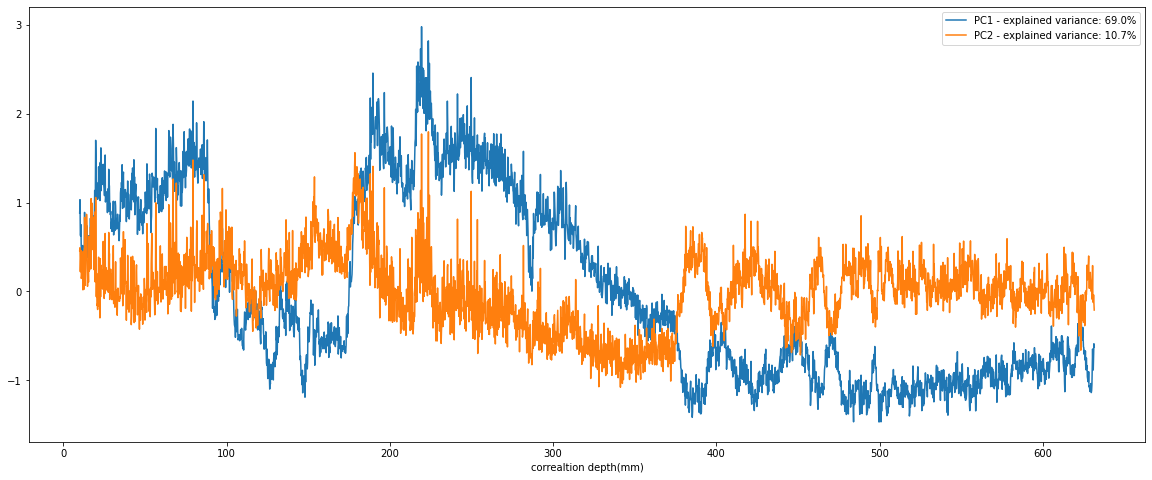

In [147]:
# Plot PCs down-core
fig, ax = plt.subplots(figsize=(20,8))
pc2plot = (1,2)
for p2p in pc2plot:
  pcat.loc[:,p2p-1].plot(label="PC{} - explained variance: {}%".format(p2p, round(evr[p2p-1]*100,1)))
ax.legend()

# Part 8.5 - Clustering


## Part 8.5.1 - Introduction to clustering - *mini-lecture*

* Data clearly has a pattern - there are clusters
* Cluster analysis is the answer to the problem: how do I identify the clusters/grouping patterns in data mathematically?
* Many different methods/what is a cluster:
 * https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

 ![clustering methods](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

Very common and conceptually simple method is k-means:
* Set a number of clusters n.
* Find n centre points to which each data point can be assigned which minimize the total distance from each data point to a cluster centre.
* Practical solution is iterative: guesses points, then moves step-wise to reduce the total distance.

Also of note:
* Hirearchical clustering/agglomerative clustering
* DBSCAN
* MeanShift

## Part 8.5.2 - applying clustering to the XRF core scan data - *walkthrough*
We will:
* Apply k-means clustering
* Investigate cluster centres
* Plot down-core
* Compare and interpret alongside the PCA results


In [148]:
# Run the k-means cluster analysis
kmeans = KMeans(n_clusters=4, random_state=0).fit(clr)

In [150]:
# Get the cluster centres and turn to dataframe
kcc = kmeans.cluster_centers_
kcc = pd.DataFrame(kcc, columns=clr.columns).T
kcc

,0,1,2,3
Si,-0.583051,0.280099,0.336367,0.167368
Ar,-0.076774,0.057593,0.056709,-0.028222
K,-0.381019,0.187025,0.223575,0.096168
Ca,-0.506874,-0.114461,0.510641,-0.100835
Ti,-0.333697,0.120932,0.184832,0.150314
Cr,-0.144082,0.045916,0.073871,0.085748
Mn,-0.680810,-0.457012,0.552780,0.474960
Fe,-0.307408,0.051818,0.230004,0.037165
Ni,0.059041,0.060233,-0.039913,-0.080036
Zn,-0.178990,0.121611,0.156229,-0.116496


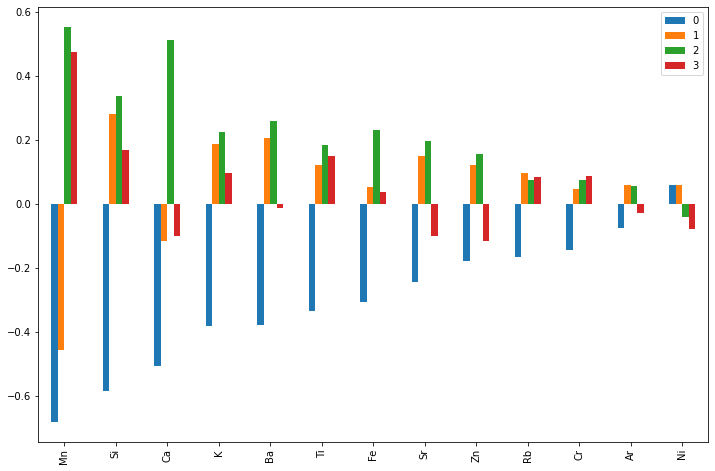

In [151]:
# Plot cluster centres to compare clusters
fig, ax = plt.subplots(figsize=(12,8))
kcc.sort_values(by=0).plot.bar(ax=ax)

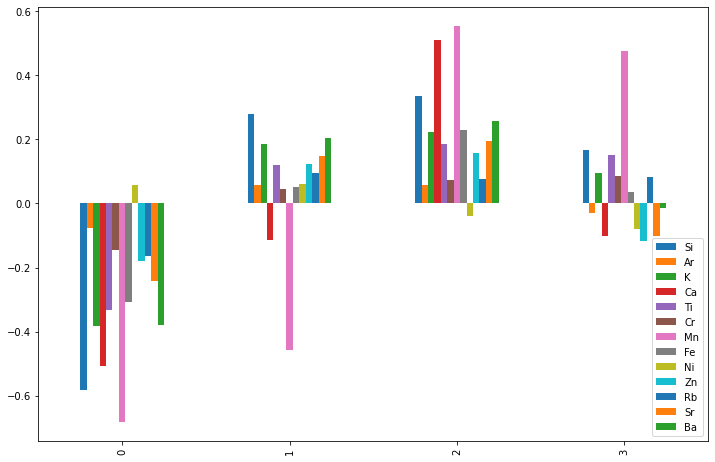

In [152]:
# Plot cluster centres to compare clusters
fig, ax = plt.subplots(figsize=(12,8))
kcc.T.plot.bar(ax=ax)

In [153]:
# Get the cluster labels for each sample
klabs = kmeans.labels_
klabs

array([0, 0, 0, ..., 2, 3, 2], dtype=int32)

(0.0, 1.0)

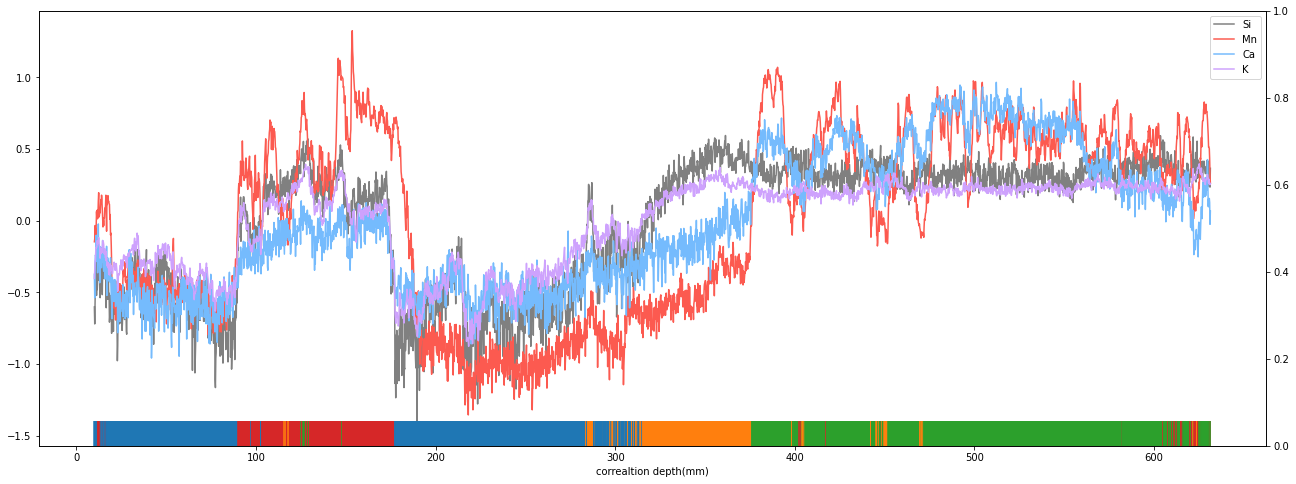

In [157]:
# Plot clusters down-core
fig, ax1a = plt.subplots(figsize=(22,8))
ax2 = ax1a.twinx()

# special colours: https://xkcd.com/color/rgb/
clr.plot(y="Si", ax=ax1a, color="gray")
clr.plot(y="Mn", ax=ax1a, color="xkcd:coral")
clr.plot(y="Ca", ax=ax1a, color="xkcd:sky blue")
clr.plot(y="K", ax=ax1a, color="xkcd:lilac")
#clr.plot(y="Ba", ax=ax1a)

ax2.scatter(clr.index, y=np.zeros(clr.index.shape), c=["C{}".format(j) for j in klabs], marker="|", s=2500)#, cmap="tab10")
ax2.set_ylim(0,1)


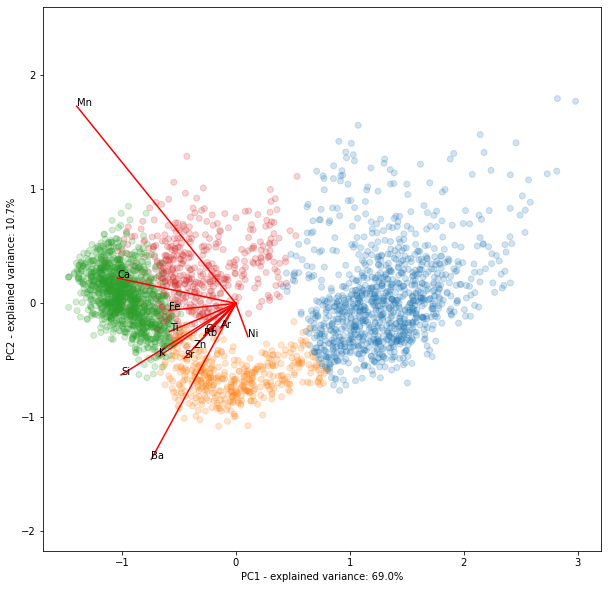

In [155]:
# Visualise clusters on PC transformed data
fig, ax = plt.subplots(figsize=(10,10))
pc2plot = (1,2)
ax.scatter(pcat.loc[:, pc2plot[0]-1], pcat.loc[:, pc2plot[1]-1], alpha=0.2, c=["C{}".format(j) for j in klabs])
ax.axis('equal')
ax.set_xlabel("PC{} - explained variance: {}%".format(pc2plot[0], round(evr[pc2plot[0]-1]*100,1)))
ax.set_ylabel("PC{} - explained variance: {}%".format(pc2plot[1], round(evr[pc2plot[1]-1]*100,1)))

for v, nm in zip(pca.components_[0:2,:].T, elements):
  vec = v * 2.5
  ax.plot([0,vec[0]], [0, vec[1]],"r")
  ax.text(vec[0],vec[1], nm)

# Part 8.6 - Extension excercises
If time, or in your own time:
1. Try calculating and then visualising the PCA for individual clusters - there might be very different relationships within clusters than within the dataset as a whole.
2. Experiment with filtering/smoothing the data before clustering or PCA analysis. For PCA, the meaningful variance is the signal, not the noise, so de-noising before analysis might make the results more robust and easier to interpret.

# PCA on cluster componenets


In [159]:
clr["cluster"] = klabs

# Filtering experiments

In [163]:
clrf = clr.rolling(11, win_type = 'gaussian', center=True, min_periods=1).mean(std=3)

In [167]:
clrf["Si_raw"] = clr["Si"]
clrf["Mn_raw"] = clr["Mn"]

In [169]:
clrf.plot(y=["Si_raw","Mn_raw", "Si", "Mn"], width=1200, height=400, backend="plotly")

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.



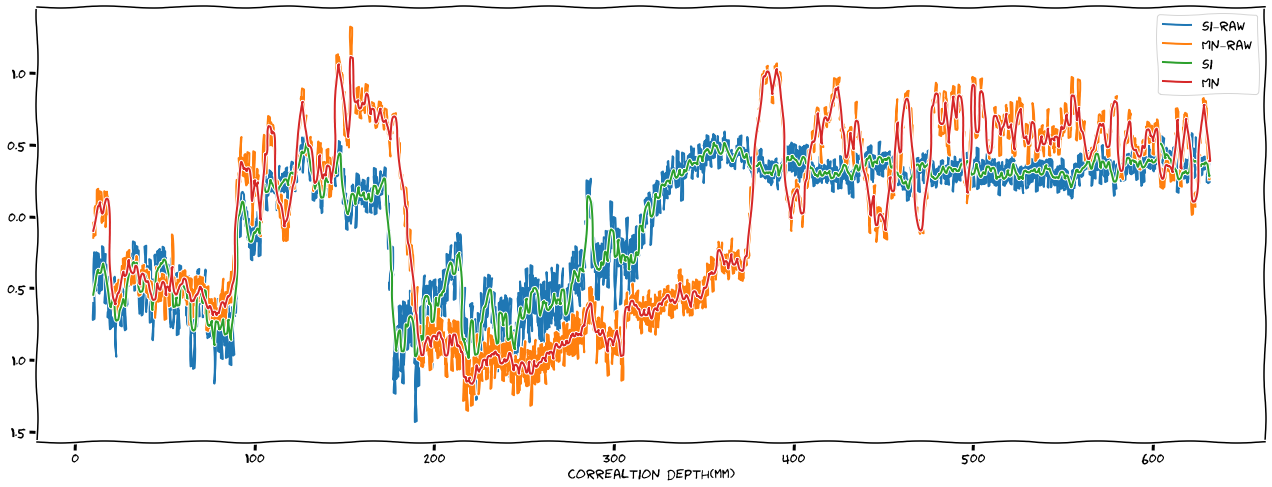

In [171]:
with plt.xkcd():
  fig, ax = plt.subplots(figsize=(22,8))
  clrf.plot(y=["Si_raw","Mn_raw", "Si", "Mn"], ax=ax)

In [195]:
clrf = clr.rolling(11, win_type = 'gaussian', center=True, min_periods=1).mean(std=3)

In [196]:
# Create and fit the PCA - i.e calculate the rotation/transformation/vectors
pca = PCA()
pca.fit(clrf)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [206]:
evr = pca.explained_variance_ratio_

In [197]:
# Transform the data
pcat = pca.transform(clrf)
pcat = pd.DataFrame(pcat, index=clrf.index)

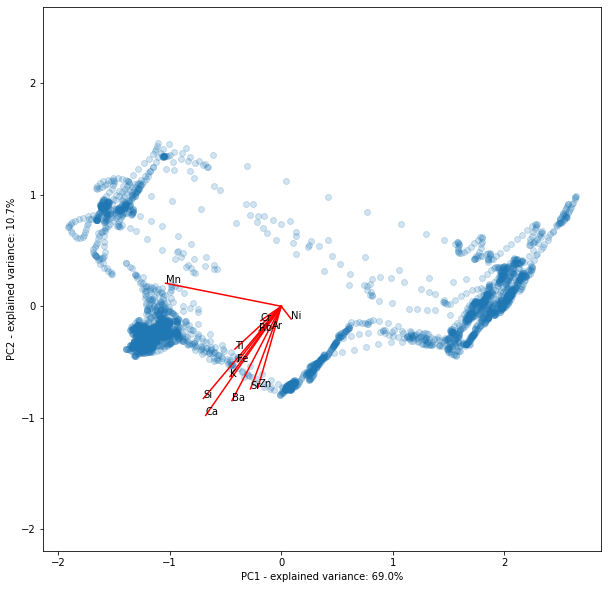

In [198]:
# Visualise how different elements contribute to the visualised PCs
fig, ax = plt.subplots(figsize=(10,10))
pc2plot = (1,2)
ax.scatter(pcat.loc[:, pc2plot[0]-1], pcat.loc[:, pc2plot[1]-1], alpha=0.2)
ax.axis('equal')
ax.set_xlabel("PC{} - explained variance: {}%".format(pc2plot[0], round(evr[pc2plot[0]-1]*100,1)))
ax.set_ylabel("PC{} - explained variance: {}%".format(pc2plot[1], round(evr[pc2plot[1]-1]*100,1)))

# plot the element vectors
for v, nm in zip(pca.components_[0:2,:].T, elements):
  vec = v * 2.5
  plt.plot([0,vec[0]], [0, vec[1]],"r")
  plt.text(vec[0],vec[1], nm)

In [199]:
# Run the k-means cluster analysis
kmeans = KMeans(n_clusters=4, random_state=0).fit(clrf)
# Get the cluster labels for each sample
klabs = kmeans.labels_
klabs

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

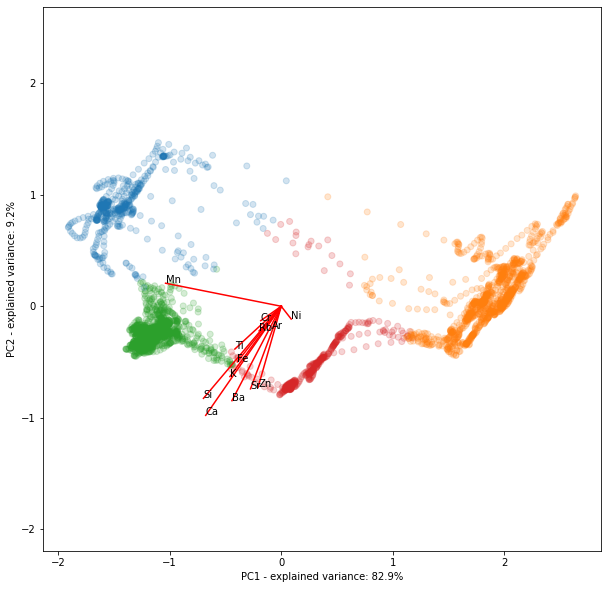

In [208]:
# Visualise clusters on PC transformed data
fig, ax = plt.subplots(figsize=(10,10))
pc2plot = (1,2)
ax.scatter(pcat.loc[:, pc2plot[0]-1], pcat.loc[:, pc2plot[1]-1], alpha=0.2, c=["C{}".format(j) for j in klabs])
ax.axis('equal')
ax.set_xlabel("PC{} - explained variance: {}%".format(pc2plot[0], round(evr[pc2plot[0]-1]*100,1)))
ax.set_ylabel("PC{} - explained variance: {}%".format(pc2plot[1], round(evr[pc2plot[1]-1]*100,1)))

for v, nm in zip(pca.components_[[np.array(pc2plot)-1],:].T, elements):
  vec = v * 2.5
  ax.plot([0,vec[0]], [0, vec[1]],"r")
  ax.text(vec[0],vec[1], nm)

(0.0, 1.0)

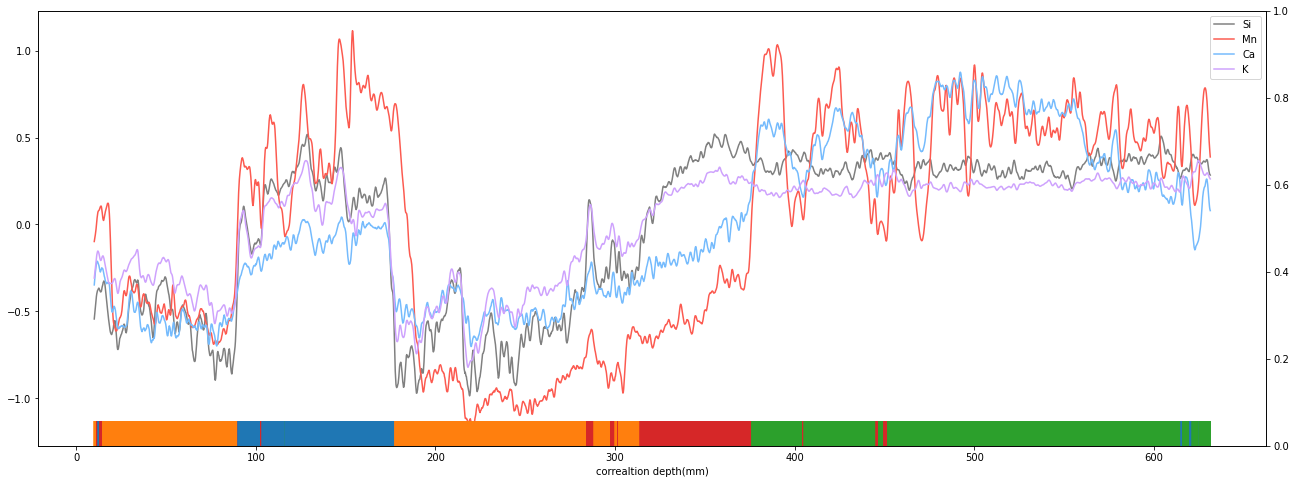

In [201]:
# Plot clusters down-core
fig, ax1a = plt.subplots(figsize=(22,8))
ax2 = ax1a.twinx()

# special colours: https://xkcd.com/color/rgb/
clrf.plot(y="Si", ax=ax1a, color="gray")
clrf.plot(y="Mn", ax=ax1a, color="xkcd:coral")
clrf.plot(y="Ca", ax=ax1a, color="xkcd:sky blue")
clrf.plot(y="K", ax=ax1a, color="xkcd:lilac")
#clr.plot(y="Ba", ax=ax1a)

ax2.scatter(clr.index, y=np.zeros(clr.index.shape), c=["C{}".format(j) for j in klabs], marker="|", s=2500)#, cmap="tab10")
ax2.set_ylim(0,1)
